<a href="https://colab.research.google.com/github/itrinia/code-TA/blob/main/TA_Ileene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ileenetrinia","key":"952ebd8e75b01c8ce4e3d354d8d22cc6"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d ileenetrinia/docunet-sroie-merged --unzip

Dataset URL: https://www.kaggle.com/datasets/ileenetrinia/docunet-sroie-merged
License(s): other


In [ ]:
# !unzip sroie-datasetv2.zip -d docunet-sroie-merged

In [ ]:
# !kaggle datasets download -d urbikn/sroie-datasetv2

Dataset URL: https://www.kaggle.com/datasets/urbikn/sroie-datasetv2
License(s): other


In [ ]:
# !kaggle datasets download -d minhbithun/docunet-dataset

Dataset URL: https://www.kaggle.com/datasets/minhbithun/docunet-dataset
License(s): unknown
^C


In [ ]:
# !unzip sroie-datasetv2.zip -d sroie-datasetv2
# !unzip docunet-dataset.zip -d docunet-dataset

Archive:  sroie-datasetv2.zip
  inflating: sroie-datasetv2/SROIE2019/layoutlm-base-uncased/config.json  
  inflating: sroie-datasetv2/SROIE2019/layoutlm-base-uncased/pytorch_model.bin  

In [4]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Path to your image folders
sroie_folder = "/content/SROIE2019/train"
docunet_folder = "/content/DocUNet_dataset/image"

# Function to get image files from a folder
def get_images_from_folder(folder_path, valid_extensions=('.jpg', '.png', '.jpeg')):
    image_files = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(valid_extensions):
                image_files.append(os.path.join(root, file))
    return image_files

# Function to create a DataFrame from image files
def create_image_df(image_files):
    data = {
        'filename': [os.path.basename(f) for f in image_files],
        'filepath': image_files,
        'size': [os.path.getsize(f) for f in image_files],
        'dimensions': [Image.open(f).size for f in image_files]
    }
    return pd.DataFrame(data)

# Get image files and create DataFrames
sroie_image_files = get_images_from_folder(sroie_folder)
sroie_df = create_image_df(sroie_image_files)  # Create DataFrame for SROIE

docunet_image_files = get_images_from_folder(docunet_folder)
docunet_df = create_image_df(docunet_image_files) # Create DataFrame for DocUNet


# Now you can use head()
print("SROIE Dataset (Training Images):")
print(sroie_df.head(5))

print("\nDocUNet Dataset (Training Images):")
print(docunet_df.head(5))

SROIE Dataset (Training Images):
           filename                                       filepath     size  \
0  X51007846391.jpg  /content/SROIE2019/train/img/X51007846391.jpg  1519053   
1  X51006332575.jpg  /content/SROIE2019/train/img/X51006332575.jpg   362381   
2  X51007339095.jpg  /content/SROIE2019/train/img/X51007339095.jpg   602430   
3  X51007339130.jpg  /content/SROIE2019/train/img/X51007339130.jpg   587700   
4  X51007103578.jpg  /content/SROIE2019/train/img/X51007103578.jpg   451027   

     dimensions  
0  (4961, 7016)  
1   (703, 1779)  
2   (623, 1515)  
3   (619, 1475)  
4   (740, 1698)  

DocUNet Dataset (Training Images):
           filename                                         filepath    size  \
0   11-f8cd507e.png   /content/DocUNet_dataset/image/11-f8cd507e.png  352179   
1  104-5797c52f.png  /content/DocUNet_dataset/image/104-5797c52f.png  220247   
2  108-4a08d869.png  /content/DocUNet_dataset/image/108-4a08d869.png  294744   
3  110-ff2d93d7.png  /conten

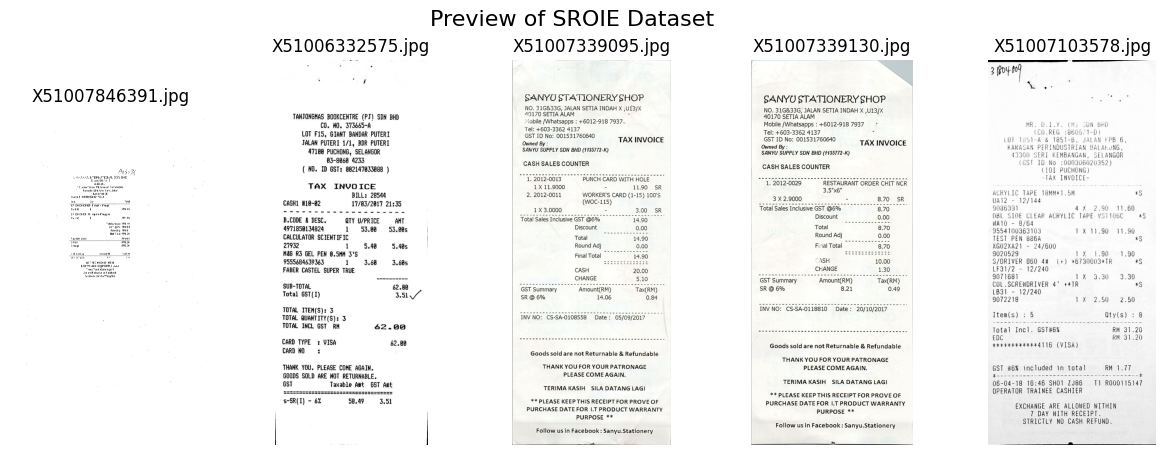

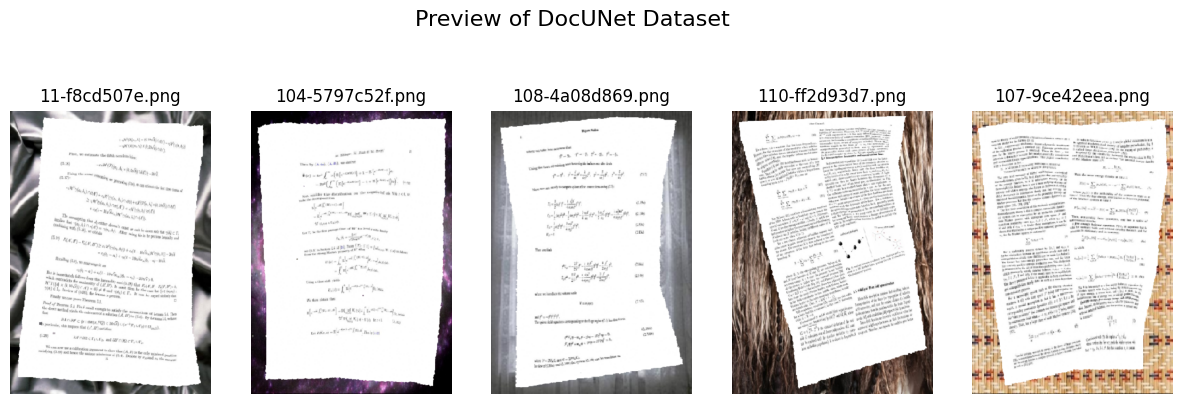

In [5]:
# Display the first 5 images from each dataset
import matplotlib.pyplot as plt
from PIL import Image

# Function to display images
def display_images(df, dataset_name, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(df))):
        img_path = df['filepath'].iloc[i]
        try:
            img = Image.open(img_path)
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.title(os.path.basename(img_path))
            plt.axis('off')
        except Exception as e:
            print(f"Error displaying image {img_path}: {e}")
    plt.suptitle(f"Preview of {dataset_name} Dataset", fontsize=16)
    plt.show()

# Display images from SROIE dataset
display_images(sroie_df, "SROIE")

# Display images from DocUNet dataset
display_images(docunet_df, "DocUNet")


In [6]:

import random
# Concatenate the two dataframes
merged_df = pd.concat([sroie_df, docunet_df], ignore_index=True)

# Display the first few rows of the merged DataFrame
print("\nMerged Dataset:")
print(merged_df.head(10))

# Shuffle the merged DataFrame
merged_df = merged_df.sample(frac=1, random_state=random.seed(42)).reset_index(drop=True)

# You can now save this merged DataFrame to a CSV file if needed
merged_df.to_csv("merged_dataset.csv", index=False)



Merged Dataset:
           filename                                       filepath     size  \
0  X51007846391.jpg  /content/SROIE2019/train/img/X51007846391.jpg  1519053   
1  X51006332575.jpg  /content/SROIE2019/train/img/X51006332575.jpg   362381   
2  X51007339095.jpg  /content/SROIE2019/train/img/X51007339095.jpg   602430   
3  X51007339130.jpg  /content/SROIE2019/train/img/X51007339130.jpg   587700   
4  X51007103578.jpg  /content/SROIE2019/train/img/X51007103578.jpg   451027   
5  X51005444045.jpg  /content/SROIE2019/train/img/X51005444045.jpg   195940   
6  X51005605333.jpg  /content/SROIE2019/train/img/X51005605333.jpg   665446   
7  X51006414431.jpg  /content/SROIE2019/train/img/X51006414431.jpg  1413381   
8  X51005722699.jpg  /content/SROIE2019/train/img/X51005722699.jpg   319875   
9  X51008099046.jpg  /content/SROIE2019/train/img/X51008099046.jpg   222247   

     dimensions  
0  (4961, 7016)  
1   (703, 1779)  
2   (623, 1515)  
3   (619, 1475)  
4   (740, 1698)  
5   (

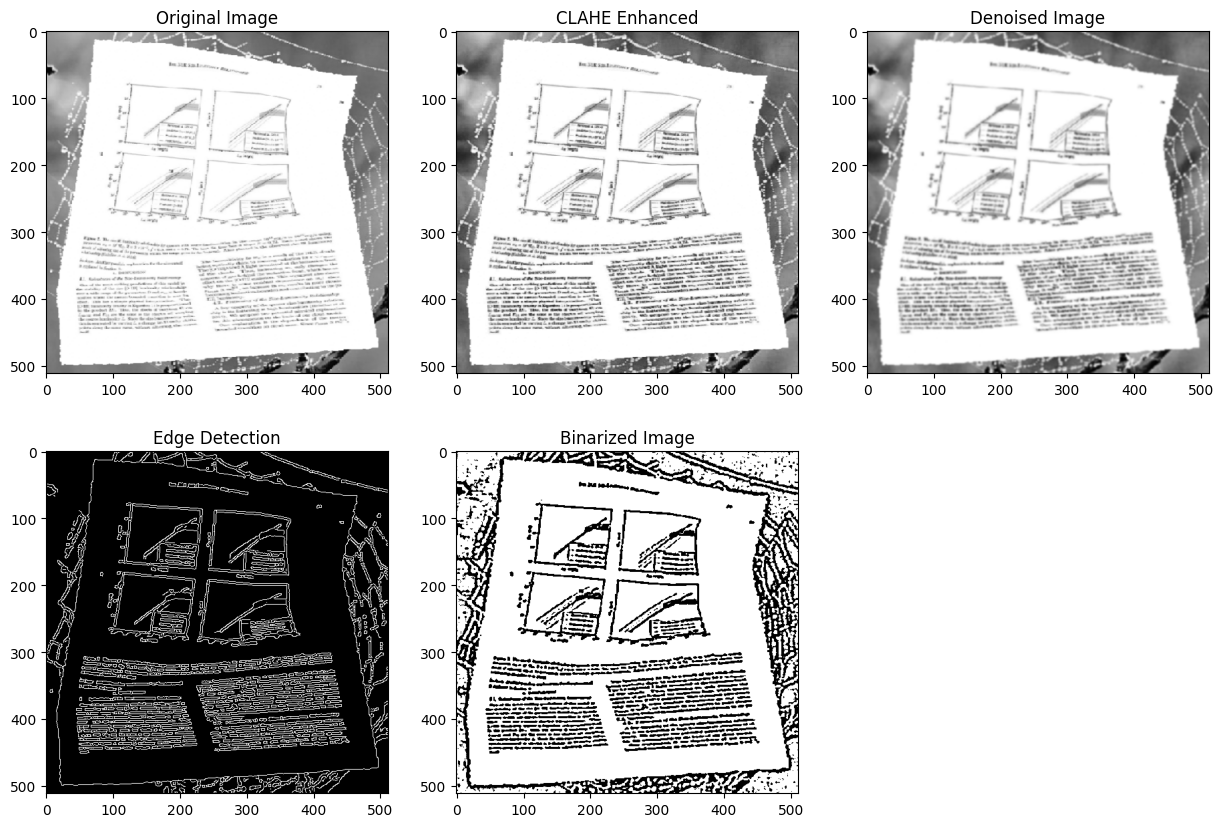

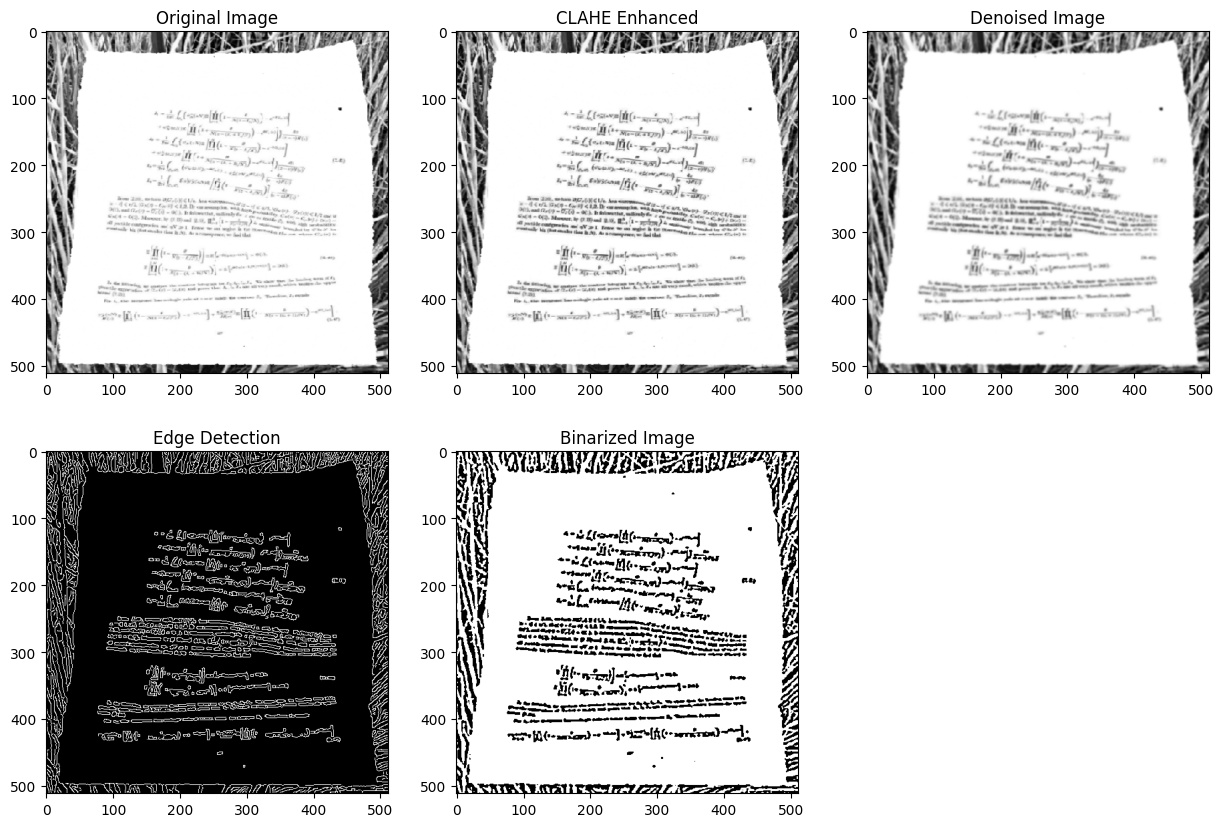

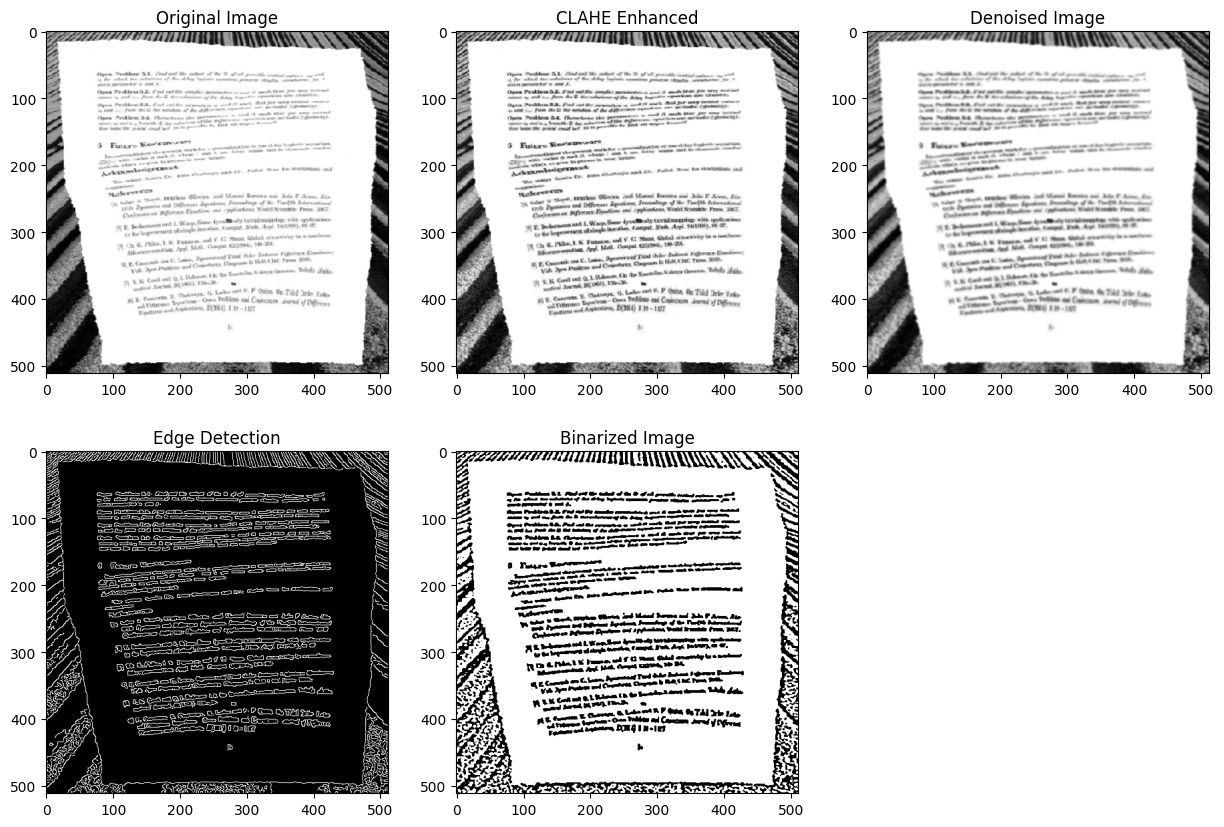

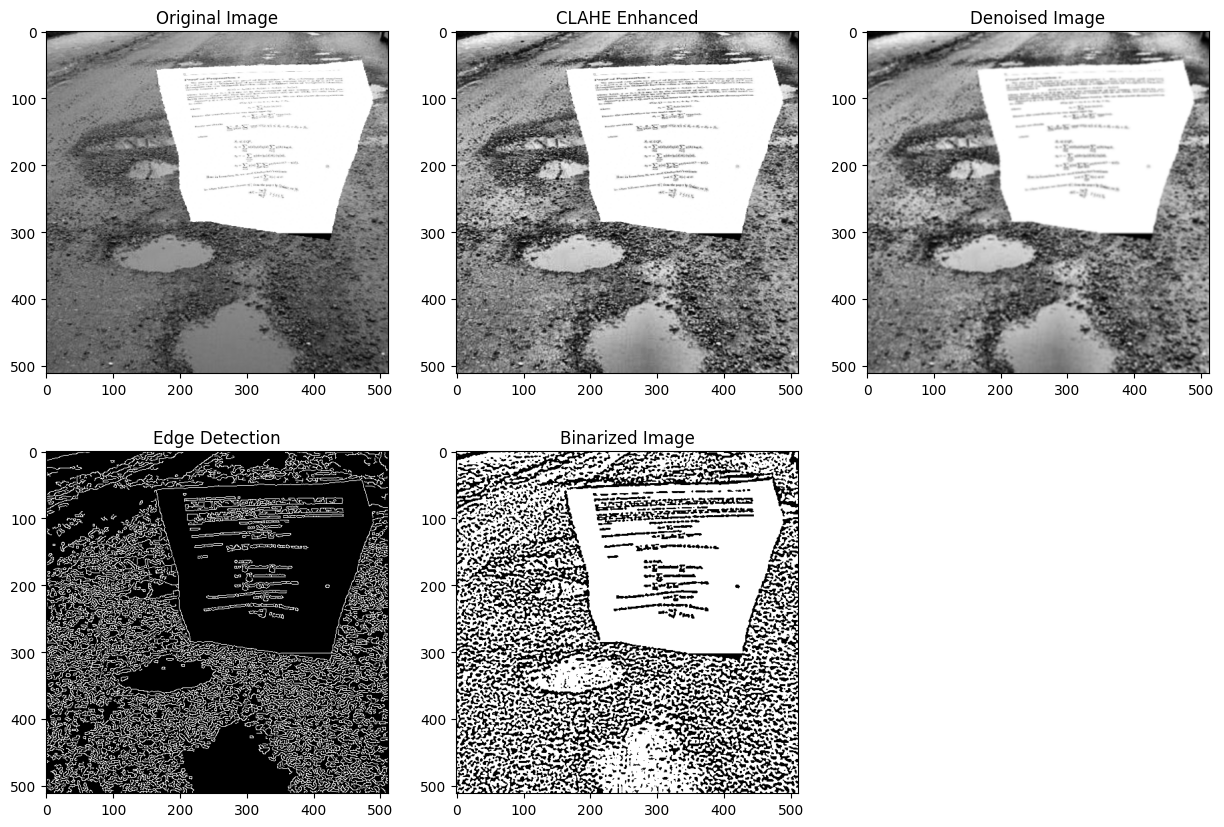

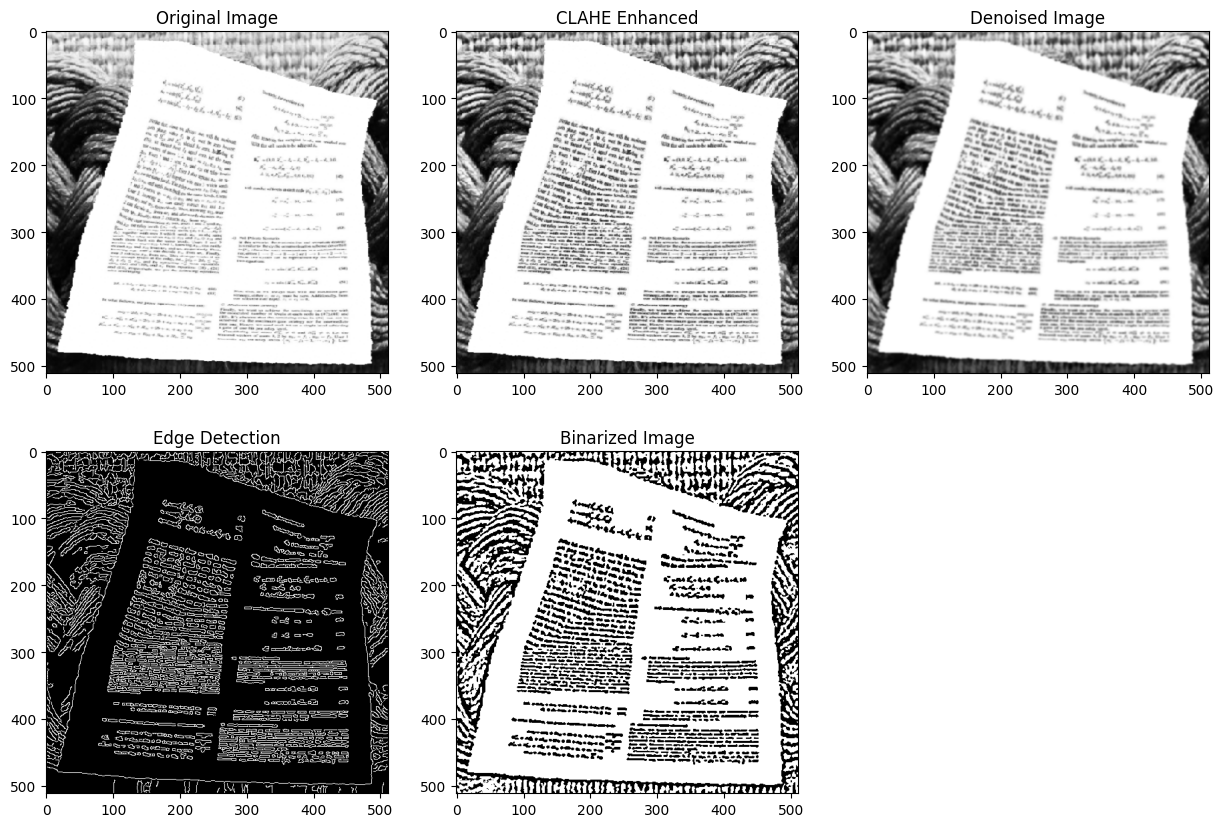

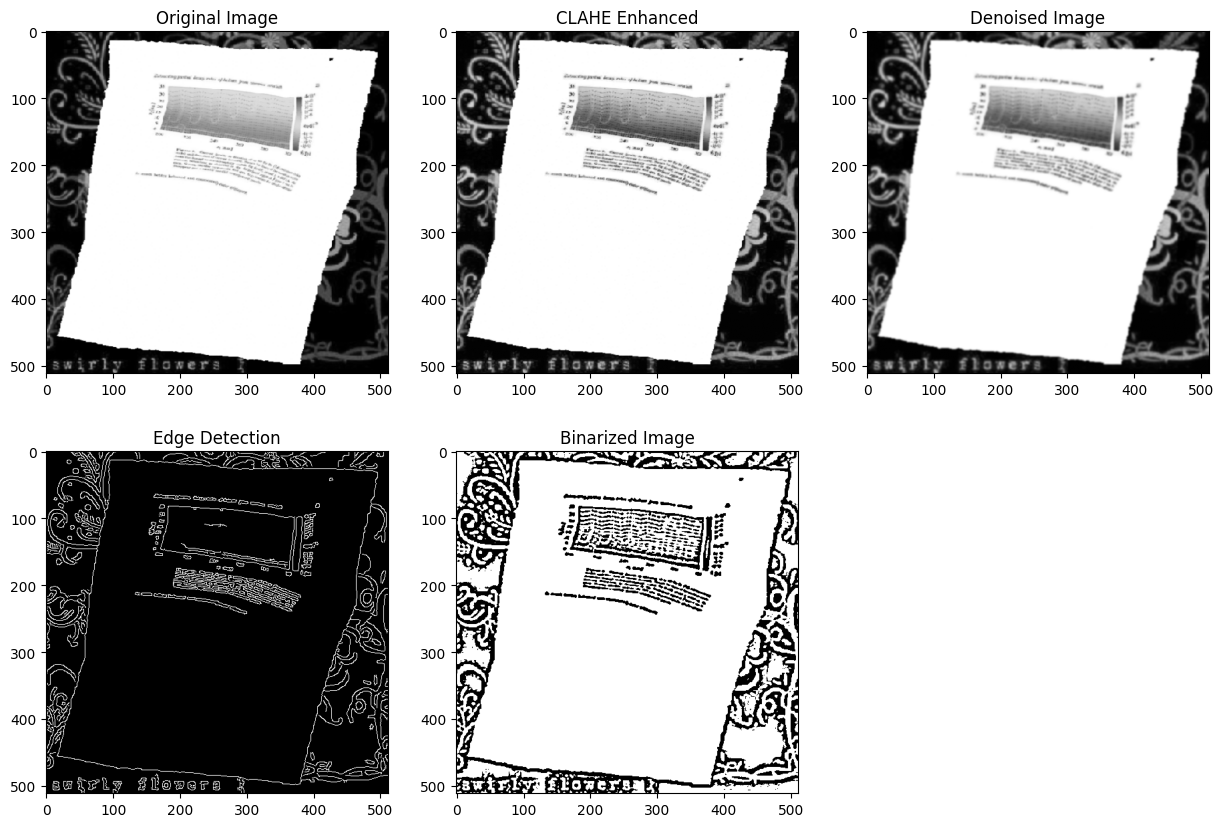

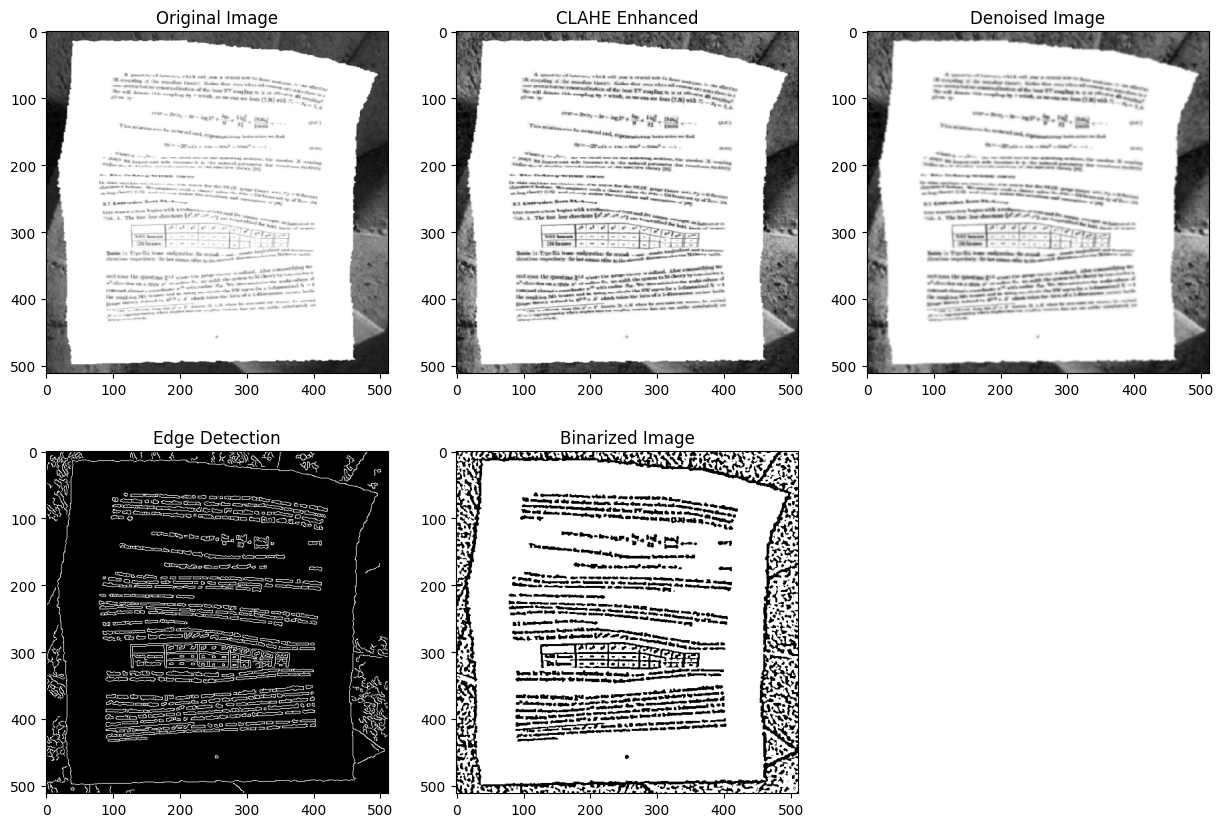

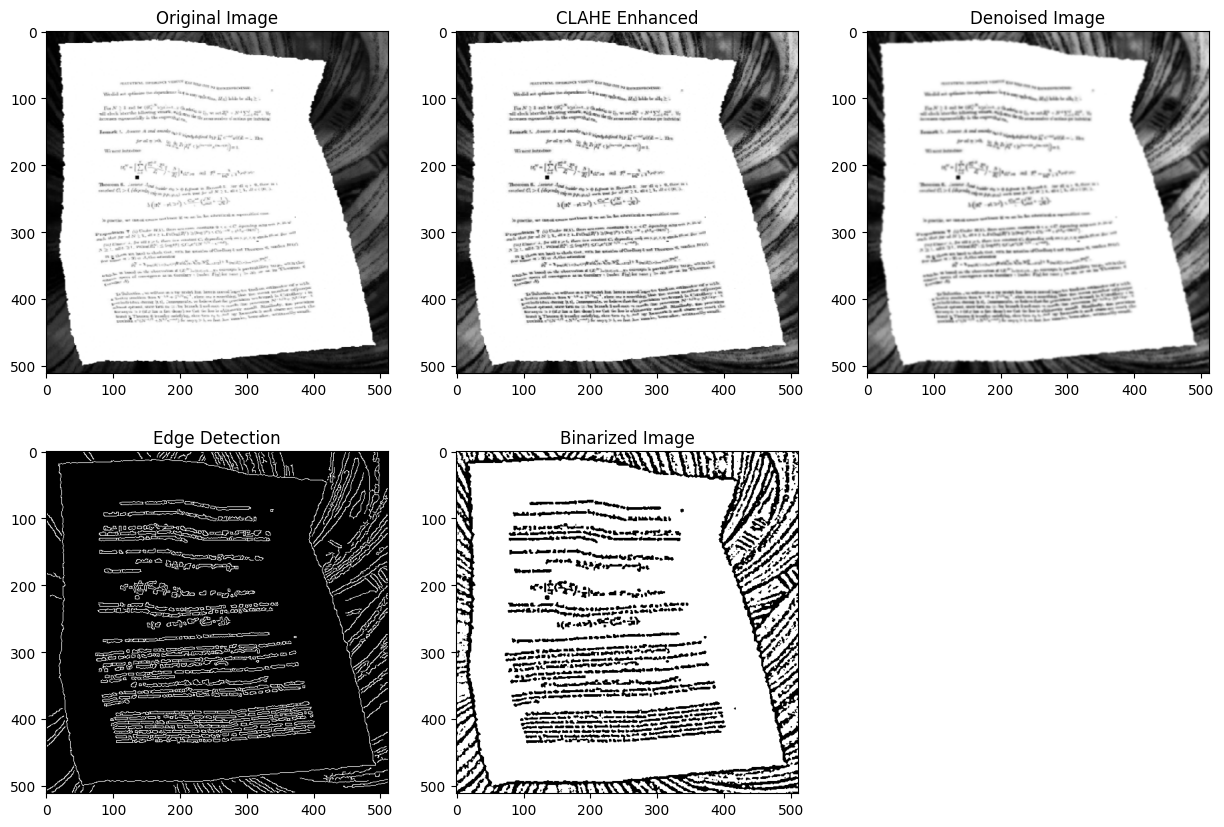

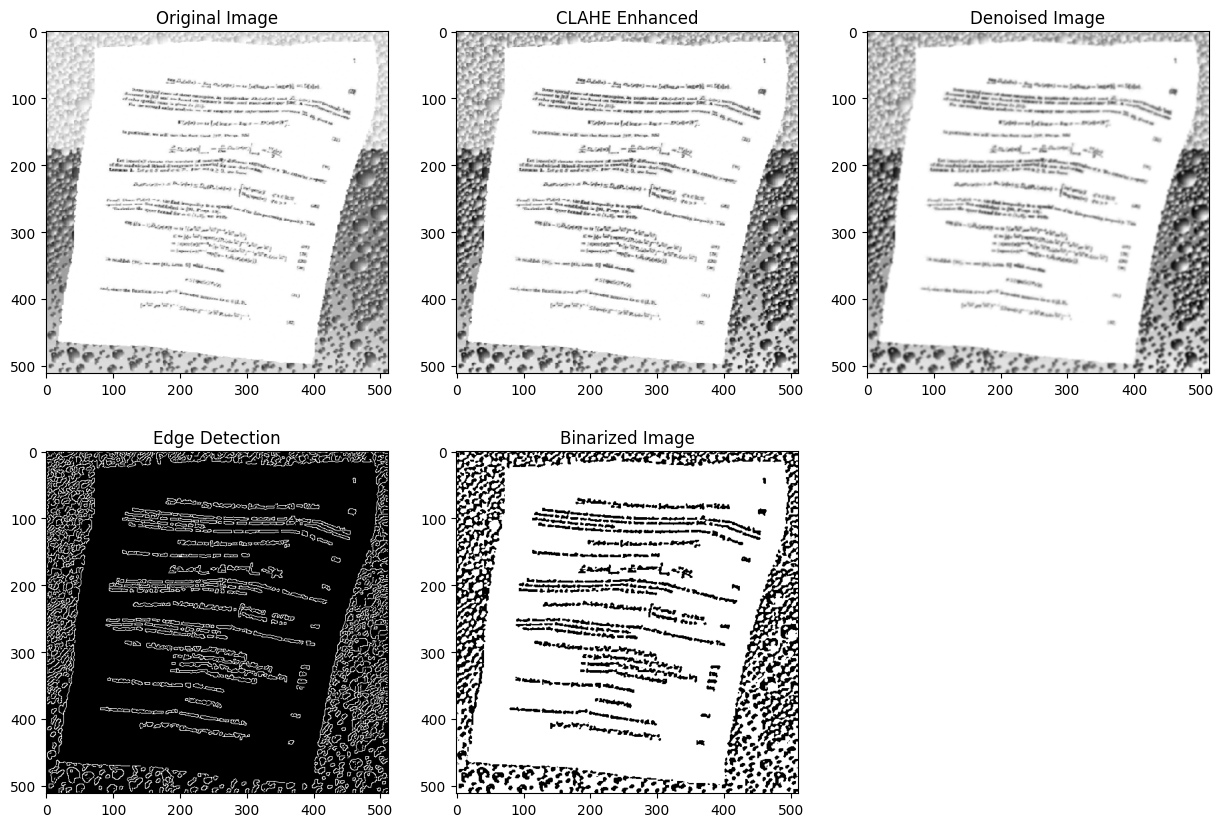

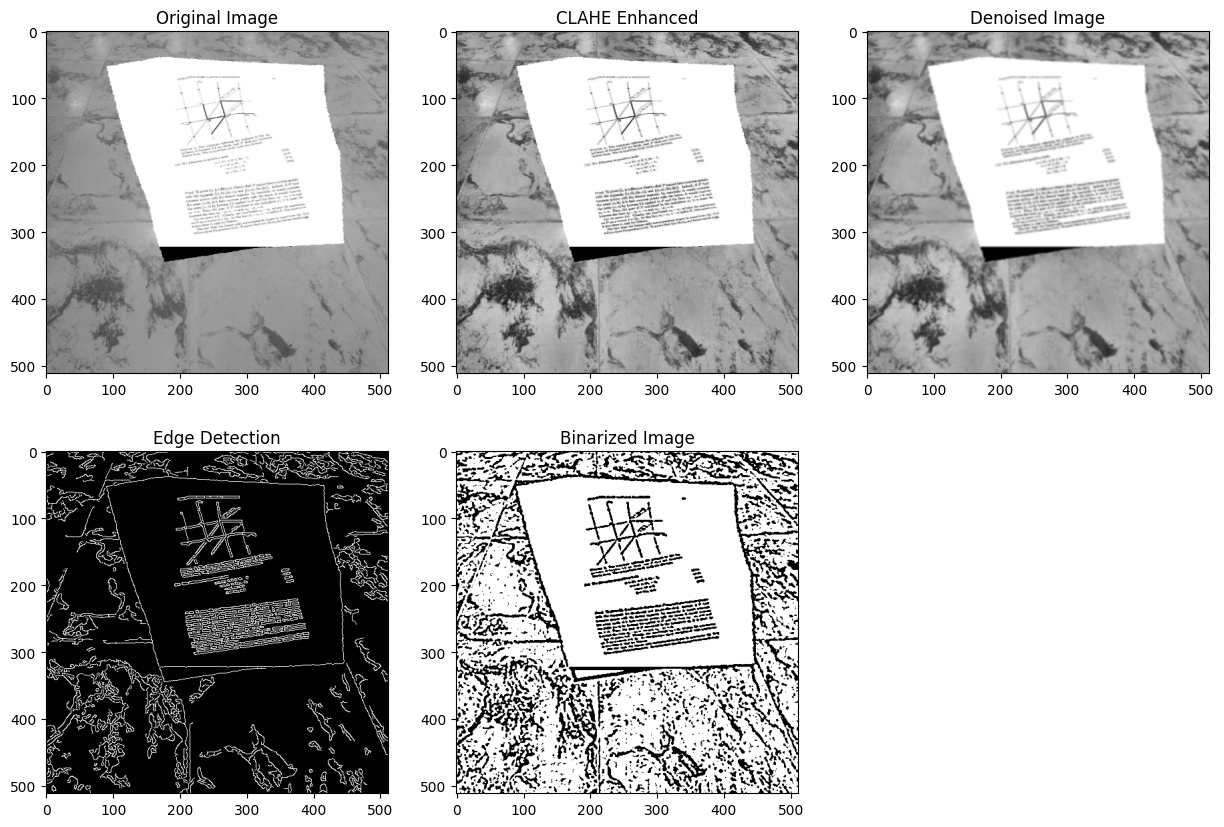

In [7]:
import cv2
import numpy as np
from skimage import exposure

def preprocess_image(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 512x512
    img = cv2.resize(img, (512, 512))

    # Normalize to [0, 1]
    img = img / 255.0

    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(np.uint8(img * 255))
    img_clahe = img_clahe / 255.0

    # Denoising (Gaussian blur)
    img_denoised = cv2.GaussianBlur(img_clahe, (5, 5), 0)

    # Edge Detection (Canny)
    img_edges = cv2.Canny(np.uint8(img_denoised * 255), 50, 150)
    img_edges = img_edges / 255.0

    # Binarization (Adaptive Thresholding)
    img_binary = cv2.adaptiveThreshold(np.uint8(img_denoised*255), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    img_binary = img_binary / 255.0

    return img, img_clahe, img_denoised, img_edges, img_binary


# Example usage with the merged dataset:
import matplotlib.pyplot as plt

# Preprocess a few images for demonstration. Modify the range to show more.
for i in range(10):
    image_path = merged_df['filepath'][i]
    original_img, img_clahe, img_denoised, img_edges, img_binary = preprocess_image(image_path)

    # Display the preprocessed images
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(2, 3, 2)
    plt.imshow(img_clahe, cmap='gray')
    plt.title('CLAHE Enhanced')

    plt.subplot(2,3,3)
    plt.imshow(img_denoised, cmap='gray')
    plt.title('Denoised Image')

    plt.subplot(2,3,4)
    plt.imshow(img_edges, cmap='gray')
    plt.title('Edge Detection')

    plt.subplot(2,3,5)
    plt.imshow(img_binary, cmap='gray')
    plt.title('Binarized Image')

    plt.show()


In [8]:
print(len(merged_df))
print(merged_df.shape)

15698
(15698, 4)


In [10]:
!pip install imgaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 37.7 MB/s eta 0:00:00


In [11]:
!pip install numpy==1.24.3
!pip install imgaug --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 w

In [9]:
import cv2
import numpy as np
import imgaug.augmenters as iaa
from tqdm import tqdm
from multiprocessing import Pool, cpu_count
import random
import pandas as pd
import os

# Define individual augmentations
augmentations = [
    iaa.Affine(rotate=(-30, 30)),
    iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),
    iaa.Affine(scale=(0.5, 1.5)),
    iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25),
    iaa.Fliplr(1.0),
    iaa.Flipud(1.0)
]

# Function to process a single image with a single random augmentation
def augment_image(args):
    idx, filepath, save_dir = args
    image = cv2.imread(filepath)
    if image is None:
        return None

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    aug = random.choice(augmentations)
    augmented_image = aug(image=image)

    output_path = f"{save_dir}/aug_{idx}.jpg"
    cv2.imwrite(output_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))
    return augmented_image

# Parallel augmentation
def parallel_augment(merged_df, num_images_to_augment=5232, save_dir="augmented"):
    os.makedirs(save_dir, exist_ok=True)

    # Randomly sample indices
    random_indices = random.sample(range(len(merged_df)), num_images_to_augment)
    filepaths = merged_df['filepath'].iloc[random_indices].tolist()

    # Prepare arguments for multiprocessing
    args_list = [(i, fp, save_dir) for i, fp in enumerate(filepaths)]

    # Use all available CPU cores
    with Pool(processes=cpu_count()) as pool:
        results = list(tqdm(
            pool.imap(augment_image, args_list),
            total=num_images_to_augment,
            desc="Augmenting images"
        ))

    return [img for img in results if img is not None]  # Filter out None results


if __name__ == "__main__":
    merged_df = pd.read_csv("merged_dataset.csv")

    # Run parallel augmentation
    augmented_images = parallel_augment(merged_df, num_images_to_augment=5232)

    # Preview some augmented images
    import matplotlib.pyplot as plt
    preview_indices = random.sample(range(len(augmented_images)), min(10, len(augmented_images)))
    plt.figure(figsize=(20, 10))
    for i, idx in enumerate(preview_indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(augmented_images[idx])
        plt.title(f"Augmented {idx}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

ModuleNotFoundError: No module named 'imgaug'

In [ ]:
augmented_filepaths = [os.path.join("augmented", f"aug_{i}.jpg") for i in range(len(augmented_images))]
augmented_data = {
    'filename': [os.path.basename(fp) for fp in augmented_filepaths],
    'filepath': augmented_filepaths,
    'size': [os.path.getsize(fp) for fp in augmented_filepaths],
    'dimensions': [Image.open(fp).size for fp in augmented_filepaths]
}

augmented_df = pd.DataFrame(augmented_data)

In [ ]:
# # image augmentation: rotation, translation, scaling, distorsi geometrik, flipping for my merge dataset. and give the preview image for the augmented images (10 pics only enough)

# import imgaug.augmenters as iaa

# # Define augmentation sequence
# seq = iaa.Sequential([
#     iaa.Sometimes(0.5, iaa.Affine(
#         rotate=(-30, 30),  # Rotate by -45 to +45 degrees
#         translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},  # Translate by -20% to +20%
#         scale=(0.5, 1.5)  # Scale by 50% to 150%
#     )),
#     iaa.Sometimes(0.3, iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # Geometric distortion
#     iaa.Fliplr(0.5),  # Flip horizontally 50% of the time
#     iaa.Flipud(0.2), # Flip vertically 20% of the time
# ], random_order=True) # Apply augmenters in random order


# # usage with the merged dataset, 2x from merged dataset
# import random
# num_images_to_augment = min(len(merged_df), 31396)
# random_indices = random.sample(range(len(merged_df)), num_images_to_augment)

# for i in random_indices:
#     image_path = merged_df['filepath'][i]
#     image = cv2.imread(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert BGR to RGB

#     # Augment the image
#     augmented_image = seq(image=image)

#     # Display the augmented image
#     plt.figure(figsize=(5, 5))
#     plt.imshow(augmented_image)
#     plt.title(f"Augmented Image {i+1}")
#     plt.axis('off')
#     plt.show()


In [ ]:
# split the augmented dataset into 70% training, 15% testing, 15% validation

import pandas as pd
from sklearn.model_selection import train_test_split

# full df = merged dataset dan augmented dataset
full_df = pd.concat([merged_df, augmented_df], ignore_index=True)

# Split full dataset menjadi training, validation, dan testing set
train_df, temp_df = train_test_split(full_df, test_size=0.3, random_state=42)
test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Print the number of samples in each set
print("Training set size:", len(train_df))
print("Testing set size:", len(test_df))
print("Validation set size:", len(val_df))

# Now you have three dataframes: train_df, test_df, and val_df
# You can save these to separate CSV files if needed:
# train_df.to_csv("train_data.csv", index=False)
# test_df.to_csv("test_data.csv", index=False)
# val_df.to_csv("val_data.csv", index=False)


Training set size: 14651
Testing set size: 3139
Validation set size: 3140


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Activation, Multiply, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import Mean
from tensorflow.image import ssim, psnr
import numpy as np
import cv2

In [ ]:
# Define the residual block
def residual_block(x, filters):
    # First convolution layer
    conv1 = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    conv1 = Activation('relu')(conv1)

    # Second convolution layer
    conv2 = Conv2D(filters, kernel_size=(3, 3), padding='same')(conv1)
    conv2 = Activation('relu')(conv2)

    # Skip connection
    skip = Add()([x, conv2])
    return skip

# Define the attention mechanism
def attention_block(x, g, filters):
    # Query and Key
    theta_x = Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    phi_g = Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(g)

    # Add and apply ReLU
    add_xg = Add()([theta_x, phi_g])
    add_xg = Activation('relu')(add_xg)

    # Attention map
    psi = Conv2D(1, kernel_size=(1, 1), strides=(1, 1), padding='same')(add_xg)
    psi = Activation('sigmoid')(psi)

    # Apply attention
    return Multiply()([x, psi])


# Define the DocUNet model
def build_docunet(input_shape=(512, 512, 1)):
    inputs = Input(input_shape)

    # Encoder
    x = Conv2D(64, kernel_size=(3, 3), padding='same')(inputs)
    x = Activation('relu')(x)
    x = residual_block(x, 64)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = residual_block(x, 128)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(256, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = residual_block(x, 256)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(512, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = residual_block(x, 512)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Bottleneck with attention mechanism
    g = Conv2D(512, kernel_size=(3, 3), padding='same')(x)
    g = Activation('relu')(g)
    g = attention_block(g, x, 512)

    # Decoder
    x = Conv2DTranspose(512, kernel_size=(3, 3), strides=(2, 2), padding='same')(g)
    x = concatenate([x, residual_block(x, 512)])
    x = Activation('relu')(x)

    x = Conv2DTranspose(256, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, residual_block(x, 256)])
    x = Activation('relu')(x)

    x = Conv2DTranspose(128, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, residual_block(x, 128)])
    x = Activation('relu')(x)

    x = Conv2DTranspose(64, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, residual_block(x, 64)])
    x = Activation('relu')(x)

    # Output layer
    outputs = Conv2D(1, kernel_size=(1, 1), activation='sigmoid')(x)

    # Build the model
    model = Model(inputs, outputs)
    return model

# Compile the model
model = build_docunet()
model.compile(optimizer=Adam(learning_rate=1e-4), loss=MeanSquaredError())

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 512, 512, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)        │ (None, 512, 512, 64)   │            640 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_27             │ (None, 512, 512, 64)   │              0 │ conv2d_25[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 512, 512, 64)   │         36,928 │ activation_27[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_28             │ (None, 512, 512, 64)   │              0 │ conv2d_26[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_27 (Conv2D)        │ (None, 512, 512, 64)   │         36,928 │ activation_28[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_29             │ (None, 512, 512, 64)   │              0 │ conv2d_27[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_9 (Add)               │ (None, 512, 512, 64)   │              0 │ activation_27[0][0],   │
│                           │                        │                │ activation_29[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 256, 256, 64)   │              0 │ add_9[0][0]            │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_30             │ (None, 256, 256, 128)  │              0 │ conv2d_28[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_29 (Conv2D)        │ (None, 256, 256, 128)  │        147,584 │ activation_30[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_31             │ (None, 256, 256, 128)  │              0 │ conv2d_29[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 256, 256, 128)  │        147,584 │ activation_31[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_32             │ (None, 256, 256, 128)  │              0 │ conv2d_30[0][0]        │
│ (Activation)              │                        │                │                        │
├──────────────────────

 Total params: 22,430,018 (85.56 MB)

 Trainable params: 22,430,018 (85.56 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# --- Training Loop ---
epochs = 20
batch_size = 16

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    # Shuffle training data
    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X_train = X_train[indices]
    y_train = y_train[indices]

    # Train in batches
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        model.train_on_batch(X_batch, y_batch)

    # Evaluate on validation data
    val_loss = model.evaluate(X_val, y_val, batch_size=batch_size, verbose=0)
    print(f"Validation Loss: {val_loss}")

    # Calculate SSIM and PSNR on validation data
    y_pred = model.predict(X_val, batch_size=batch_size)
    ssim_value = tf.reduce_mean(ssim(y_val, y_pred, max_val=1.0))
    psnr_value = tf.reduce_mean(psnr(y_val, y_pred, max_val=1.0))
    print(f"SSIM: {ssim_value.numpy()}, PSNR: {psnr_value.numpy()}")

# --- Save and Evaluate ---
model.save("docunet_model.h5")
test_loss = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print(f"Test Loss: {test_loss}")

y_test_pred = model.predict(X_test, batch_size=batch_size)
test_ssim = tf.reduce_mean(ssim(y_test, y_test_pred, max_val=1.0))
test_psnr = tf.reduce_mean(psnr(y_test, y_test_pred, max_val=1.0))
print(f"Test SSIM: {test_ssim.numpy()}, Test PSNR: {test_psnr.numpy()}")

Epoch 1/20


NameError: name 'X_train' is not defined